# Pentathlon 2: Testing for the best frequency

In [1]:
# loading required python packages
# you can add more packages as needed but *only* use packages 
# that are already part of the docker computing environment
import numpy as np
import pandas as pd
import seaborn as sns

### Question 1: Calculate the CLV over 8 weeks for each email frequency (8 points)

In [86]:
# load data from the excel file here
# each freq1-freq5 variable should be a pandas DataFrame with shape (8, 3)
# set the colum names to "attr" for subcriber attrition, "rev_sub" for average revenue
# from a subscribed customer, and "rev_unsub" for average revenue
# from an unsubscribed customer

df = pd.read_excel('data/pentathlon-2.xls', index_col=0).transpose()

# new_header = df.iloc[] #grab the first row for the header
# df = df[1:] #take the data less the header row
# df.columns = new_header #set the header row as the df header
df = df.rename(columns={"Subscriber attrition for promotional e-mails": "attr", 
                                        "Average revenue from subscribed customer": "rev_sub", 'Average revenue from unsubscribed customer': 'rev_unsub' })
freq1 = df.iloc[:, 0:3]
freq2 = df.iloc[:,4:8].set_index('2 e-mails per week')
freq3 = df.iloc[:, 9:13].set_index('3 e-mails per week')
freq4 = df.iloc[:, 14:18].set_index('4 e-mails per week')
freq5 = df.iloc[:, 19:23].set_index('5 e-mails per week')
freq4.head()

1 e-mail per week,attr,rev_sub,rev_unsub
4 e-mails per week,,,
Week 1,0.0385,0.36,0
Week 2,0.0525,0.34,0.19
Week 3,0.058,0.3,0.16
Week 4,0.0413,0.38,0.18
Week 5,0.0398,0.39,0.17


In [87]:
freq2

1 e-mail per week,attr,rev_sub,rev_unsub
2 e-mails per week,,,
Week 1,0.006,0.35,0
Week 2,0.007,0.3,0.19
Week 3,0.0076,0.35,0.16
Week 4,0.0073,0.39,0.13
Week 5,0.0093,0.31,0.13
Week 6,0.0064,0.33,0.12
Week 7,0.0065,0.35,0.13
Week 8,0.006,0.34,0.13


In [56]:
# list your assumptions here
weeks = np.arange(1, 9)
cogs = 0.6 # cost of goods sold
annual_discount_rate = 0.1
weekly_discount_rate = (1 + annual_discount_rate)**(1/52) - 1
weekly_discount_rate

0.0018345688392329418

In [57]:
# calculate CLV for e-mail frequency 4 (i.e., freq4)
# this will require calculating each of the following variables
# each calculated object should be of shape (8,)

In [59]:
#create a new dataframe that set week 1 churn to 0
freq4['churn'] = freq4['attr'].shift().fillna(0)
#required
# week 1 churn = 0
profit_subcribed = freq4['rev_sub'] - freq4['rev_sub']*cogs
profit_unsubscribed = freq4['rev_unsub'] - freq4['rev_unsub']*cogs
probability_subscribed = (1 - freq4['churn']).cumprod()
probability_unsubscribed = 1 - probability_subscribed
expected_profit = profit_subcribed*probability_subscribed + profit_unsubscribed*probability_unsubscribed
pv_expected_profit = expected_profit/(1+weekly_discount_rate)**weeks
clv = pv_expected_profit.cumsum()

print(clv)


4 e-mails per week
Week 1    0.143736
Week 2    0.276937
Week 3    0.391324
Week 4    0.530951
Week 5    0.670071
Week 6    0.786305
Week 7    0.906245
Week 8    1.026644
dtype: object


In [60]:
# take your code above and use it as the base to define a function to calculate clv 
# this will avoid repetitive code
# note that the function "clv_calc" should be sufficiently general to work with the data
# for each of the 5 e-mail frequencies 
# note that the function must be defined in a cell above the code that calls the function

In [61]:
def clv_calc(df, weeks, cogs, wd):
    """
    Calculate the cumulative present value of profits
    and CLV for a pandas data frame using the results from 
    the email frequency experiment
    
    Parameters
    ----------
    df : Pandas DataFrame (8, 3)
        A DataFrame with revenue and attrition information
    weeks : Numpy array 
        Array of shape (8,) with values 1 through 8
    cogs : float
        Cost of Goods Sold
    wd: float
        Weekly discount rate
        
    Returns
    -------
    Pandas series of shape (8,)
        CLV values calculate for week 1 through week 8

    """
    
    # insert your code
    df['churn'] = df['attr'].shift().fillna(0)
    profit_subcribed = df['rev_sub'] - df['rev_sub']*cogs
    profit_unsubscribed = df['rev_unsub'] - df['rev_unsub']*cogs
    probability_subscribed = (1 - df['churn']).cumprod()
    probability_unsubscribed = 1 - probability_subscribed
    expected_profit = profit_subcribed*probability_subscribed + profit_unsubscribed*probability_unsubscribed
    pv_expected_profit = expected_profit/(1+wd)**weeks
    clv = pv_expected_profit.cumsum()

    return clv

In [62]:
clv_calc(freq1, weeks, 0.6, weekly_discount_rate)

<ipython-input-61-87b2d73f7170>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn'] = df['attr'].shift().fillna(0)


Week 1    0.115788
Week 2    0.239116
Week 3    0.357969
Week 4     0.48408
Week 5    0.597913
Week 6    0.699639
Week 7    0.804652
Week 8    0.913132
dtype: object

In [63]:
# call the 'clv_calc` function to create a pandas dataframe `CLV8` 
# with shape (8, 6). One of the columns should be called 'weeks'
# and the others 'freq1', 'freq2', etc.

df_1 = clv_calc(freq1, weeks, cogs, weekly_discount_rate).to_frame().rename(columns={0:'freq1'}).reset_index(drop=True)
df_2 = clv_calc(freq2, weeks, cogs, weekly_discount_rate).to_frame().rename(columns={0:'freq2'}).reset_index(drop=True)
df_3 = clv_calc(freq3, weeks, cogs, weekly_discount_rate).to_frame().rename(columns={0:'freq3'}).reset_index(drop=True)
df_4 = clv_calc(freq4, weeks, cogs, weekly_discount_rate).to_frame().rename(columns={0:'freq4'}).reset_index(drop=True)
df_5 = clv_calc(freq5, weeks, cogs, weekly_discount_rate).to_frame().rename(columns={0:'freq5'}).reset_index(drop=True)
week_df = pd.DataFrame(weeks).rename(columns={0:'weeks'})
CLV8 = pd.concat([week_df, df_1, df_2, df_3, df_4, df_5], axis=1)
CLV8

<ipython-input-61-87b2d73f7170>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn'] = df['attr'].shift().fillna(0)


,weeks,freq1,freq2,freq3,freq4,freq5
0,1,0.115788,0.139744,0.147729,0.143736,0.143736
1,2,0.239116,0.259042,0.26988,0.276937,0.271861
2,3,0.357969,0.397294,0.409082,0.391324,0.384678
3,4,0.48408,0.550043,0.558557,0.530951,0.52218
4,5,0.597913,0.670942,0.681991,0.670071,0.649644
5,6,0.699639,0.798453,0.80956,0.786305,0.773973
6,7,0.804652,0.932948,0.943915,0.906245,0.888073
7,8,0.913132,1.062909,1.071311,1.026644,0.994697


### Question 2: Create a line graph of the CLV values for each plan change over the 8 week period. Your code should create a single plot with 5 lines (2 points)

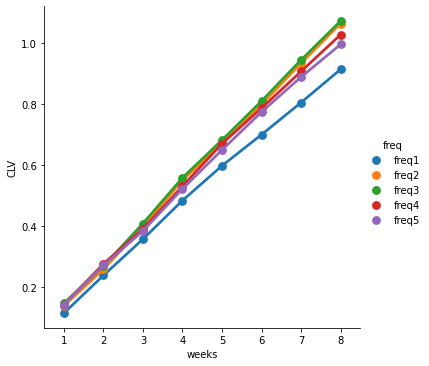

In [83]:
# use seaborn to create a line chart that shows CLV over the 8 week period
# for each of the 5 email frequencies (i.e., 1 plot with 5 lines)


long_df = CLV8.melt('weeks', var_name='freq', value_name='CLV') # convert to long (tidy) form
fig = sns.catplot(x="weeks", y="CLV", hue='freq', data=long_df, kind='point')


### Question 3: What e-mail frequency should Pentathlon adopt based on the available data? (6 points)

... motivate your recommendation here ...
CLV for freq 3 is highest, thus the company should choose to send 3 emails per week

### Question 4: What e-mail frequency would you recommend if you considered a longer time horizon?

... motivate your recommendation here ...
I recommend sending 2 emails per week, because frequency 2 has a comparatively lower churn rate, 
and the revenue is not too bad, which can generate better CLV in the long run.

### Question 5: CLV over 104 weeks (4 points)

Calculate the CLV for each of the 5 plans after 104 weeks using the average churn and revenue numbers from `pentathlon-2-avg.csv` in the git repo.

In [65]:
# load input data for simulation here
sim_clv = pd.read_csv('data/pentathlon-2-avg.csv')

freq1_104 = sim_clv.iloc[0, :].to_frame().transpose()
freq2_104 = sim_clv.iloc[1, :].to_frame().transpose()
freq3_104 = sim_clv.iloc[2, :].to_frame().transpose()
freq4_104 = sim_clv.iloc[3, :].to_frame().transpose()
freq5_104 = sim_clv.iloc[4, :].to_frame().transpose()

freq4_104

,email_freq,schurn,rev_sub,rev_unsub
3,freq4,0.03665,0.355157,0.138084


In [68]:
# list your assumptions here
weeks104 = np.arange(1, 104 + 1)
cogs = 0.6 
annual_discount_rate = 0.1
weekly_discount_rate = (1 + annual_discount_rate)**(1/52) - 1
weekly_discount_rate

0.0018345688392329418

In [69]:
# weeks104

In [70]:
# calculate CLV for e-mail frequency 4 (i.e., freq4)
# this will require calculating each of the following variables
# each calculated object below should be either a float or of shape (104,)

In [77]:
#churn (set week 1 == 0)
profit_subcribed104 = (freq4_104['rev_sub']* (1-cogs)).repeat(weeks104.size)
profit_subcribed104.name=False
profit_unsubscribed104 = (freq4_104['rev_unsub'] * (1-cogs)).repeat(weeks104.size)
profit_unsubscribed104.name=False
churn_104 = freq4_104['schurn'].repeat(weeks104.size)
probability_subscribed104 = (1 - churn_104).cumprod()  
probability_subscribed104
probability_subscribed104 = pd.concat([pd.Series([1]), probability_subscribed104]).iloc[:-1]
probability_unsubscribed104 = 1 - probability_subscribed104
expected_profit104 = np.multiply(probability_subscribed104.tolist(),profit_subcribed104.tolist())+np.multiply(probability_unsubscribed104.tolist(),profit_unsubscribed104.tolist())
pv_expected_profit104 = expected_profit104/(1+weekly_discount_rate)**weeks104
clv104 = pv_expected_profit104.cumsum()
clv104

array([0.14180261, 0.28017488, 0.41524488, 0.54713579, 0.67596604,
       0.80184954, 0.92489582, 1.04521021, 1.162894  , 1.27804459,
       1.39075567, 1.50111731, 1.60921613, 1.71513544, 1.81895535,
       1.9207529 , 2.02060219, 2.11857446, 2.21473822, 2.30915937,
       2.40190129, 2.4930249 , 2.58258881, 2.67064939, 2.75726084,
       2.84247528, 2.92634284, 3.00891174, 3.09022835, 3.17033725,
       3.24928132, 3.32710182, 3.40383841, 3.47952923, 3.55421098,
       3.62791894, 3.70068706, 3.77254796, 3.84353304, 3.9136725 ,
       3.98299537, 4.05152959, 4.11930201, 4.18633848, 4.25266385,
       4.31830202, 4.38327598, 4.44760785, 4.51131889, 4.57442957,
       4.63695957, 4.69892781, 4.76035251, 4.82125118, 4.88164068,
       4.94153721, 5.00095636, 5.05991313, 5.11842195, 5.1764967 ,
       5.23415074, 5.29139691, 5.34824757, 5.40471461, 5.46080947,
       5.51654316, 5.57192627, 5.62696899, 5.68168111, 5.73607207,
       5.79015096, 5.8439265 , 5.89740709, 5.95060083, 6.00351

In [78]:
# calculate CLV for each of the 5 e-mail frequencies and combine the result in a dataframe
# define a function "sim_csv_calc" to avoid repetitive code
# note that the function must be defined in a cell above the code that calls the function

In [79]:
freq4_104

,email_freq,schurn,rev_sub,rev_unsub
3,freq4,0.03665,0.355157,0.138084


In [80]:
def sim_clv_calc(df, weeks, cogs, wd):
    """
    Calculate the cumulative present value of profits
    and CLV for a pandas data frame with simulated 
    subscriber churn over a 104 week period
    
    Parameters
    ----------
    df : Pandas DataFrame (1, 4)
        A DataFrame with revenue and attrition information
    weeks : Numpy array 
        Array of shape (n,) with values 1 through n
    cogs : float
        Cost of Goods Sold
    wd: float
        Weekly discount rate
        
    Returns
    -------
    Pandas series of shape (n,)
        CLV values calculate for week 1 through week n

    """

    # insert your code
    
    profit_subcribed104 = (df['rev_sub']* (1-cogs)).repeat(weeks.size)
    profit_subcribed104.name=False
    profit_unsubscribed104 = (df['rev_unsub'] * (1-cogs)).repeat(weeks.size)
    profit_unsubscribed104.name=False
    prob_sub104 = df['schurn'].repeat(weeks.size)
    probability_subscribed104 = (1 - prob_sub104).cumprod()  
    probability_subscribed104 = pd.concat([pd.Series([1]), probability_subscribed104]).iloc[:-1]
    probability_unsubscribed104 = 1 - probability_subscribed104

    expected_profit104 = (np.multiply(profit_subcribed104.to_frame(), probability_subscribed104.to_frame()) + np.multiply(profit_unsubscribed104.to_frame(), probability_unsubscribed104.to_frame())).squeeze(axis=1) 
    # unsubscribe 要不要乘以機率啊 ？？？？？？？
    pv_expected_profit104 = expected_profit104/(1+wd)**weeks
    clv = pv_expected_profit104.cumsum()
    clv
    
    return clv

In [82]:
# calculate CLV for each of the 5 e-mail frequencies and combine the result in a dataframe
# with shape (104, 6) using your sim_clv_calc function
# the column names should be freq1-freq5 and weeks

df_1_104 = sim_clv_calc(freq1_104, weeks104, cogs, weekly_discount_rate).to_frame().rename(columns={0:'freq1_104'}).reset_index(drop=True)
df_2_104 = sim_clv_calc(freq2_104, weeks104, cogs, weekly_discount_rate).to_frame().rename(columns={0:'freq2_104'}).reset_index(drop=True)
df_3_104 = sim_clv_calc(freq3_104, weeks104, cogs, weekly_discount_rate).to_frame().rename(columns={0:'freq3_104'}).reset_index(drop=True)
df_4_104 = sim_clv_calc(freq4_104, weeks104, cogs, weekly_discount_rate).to_frame().rename(columns={0:'freq4_104'}).reset_index(drop=True)
df_5_104 = sim_clv_calc(freq5_104, weeks104, cogs, weekly_discount_rate).to_frame().rename(columns={0:'freq5_104'}).reset_index(drop=True)
week_df_104 = pd.DataFrame(weeks104).rename(columns={0:'weeks'})

CLV104 = pd.concat([week_df_104, df_1_104, df_2_104, df_3_104, df_4_104, df_5_104], axis=1)
CLV104

<ipython-input-80-ca658fe85c0a>:36: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  expected_profit104 = (np.multiply(profit_subcribed104.to_frame(), probability_subscribed104.to_frame()) + np.multiply(profit_unsubscribed104.to_frame(), probability_unsubscribed104.to_frame())).squeeze(axis=1)


,weeks,freq1_104,freq2_104,freq3_104,freq4_104,freq5_104
0,1,0.115789,0.135754,0.142235,0.141803,0.143251
1,2,0.231097,0.270726,0.282201,0.280175,0.281171
2,3,0.345926,0.404922,0.419954,0.415245,0.414061
3,4,0.460279,0.538348,0.555548,0.547136,0.542207
4,5,0.574159,0.671009,0.689036,0.675966,0.665875
...,...,...,...,...,...,...
99,100,9.547118,10.48072,8.33319,7.253408,6.360057
100,101,9.625036,10.560623,8.387553,7.301032,6.403855
101,102,9.702663,10.640142,8.441666,7.348505,6.447561
102,103,9.779999,10.719281,8.495534,7.395831,6.491173


### Question 6 (2 points)

Create a line chart that shows CLV over the 104 week period for each of the 5 email frequencies (i.e., 1 plot with 5 lines)

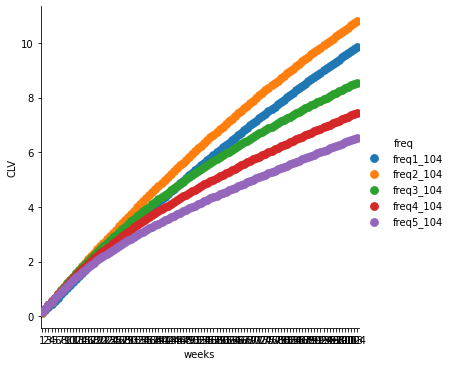

In [88]:
long_df = CLV104.melt('weeks', var_name='freq', value_name='CLV') # convert to long (tidy) form
fig = sns.catplot(x="weeks", y="CLV", hue='freq', data=long_df, kind='point')


### Question 7 (2 points)

Are your results consistent with your answer to question 3? Why (or why not)? 

... provide discussion here ...
The result is consistent to question 3, which means that 

### Question 8 (5 points)

Discuss at least two limitations of the experiment. How would you address these limitations?

... discuss limitations here ...
1. We take the revenue generated by unsubscribed users into account, but these users no longer received emails, this would confound the experiment. We should only focus on the "average revenue generated by active users", instead of the total revenue.

2. We should run power analysis before the experiment to check how long the experiment should run, how big the sample size should be.

3. We should make sure that there is no other external factors that might cause the revenue to rise and fall. For example, the experiment is not run during holiday season, no other changes are running at the same time. 